In [16]:
!curl -L https://figshare.com/ndownloader/files/37681653 -o data/bfsongrepo/sober.repo1.gy6or6.032312.cbin.not.mat.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  155M  100  155M    0     0  12.0M      0  0:00:12  0:00:12 --:--:-- 14.2M


In [22]:
!tar -xzf data/bfsongrepo/sober.repo1.gy6or6.032312.cbin.not.mat.tar.gz -C data/bfsongrepo

Import VocalPy

In [23]:
import vocalpy as voc

Load data

In [24]:
data_dir = ('data/bfsongrepo/gy6or6/032312/')

cbin_paths = voc.paths.from_dir(data_dir, 'cbin')

In [25]:
audios = [voc.Audio.read(cbin_path) for cbin_path in cbin_paths]

In [59]:
audio = audios[0]

In [65]:
data = np.array(audio.data)

In [61]:
squared = np.power(data, 2)

In [64]:
squared.max()

32761

In [67]:
new_dtype_str = str(data.dtype)[:-1] + str(int(str(data.dtype)[-1]) ** 2)
data2 = data.astype(np.dtype(new_dtype_str))

In [69]:
squared2 = np.power(data2, 2)

In [73]:
squared2[:10]

array([52900, 49729, 55225, 51984, 56169, 56169, 55225, 49729, 44521,
       37636], dtype=int32)

In [84]:
import evfuncs

In [85]:
audio

vocalpy.Audio(data=array([-230, ..., dtype=int16), samplerate=32000, channels=1), path=data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0808.138.cbin)

In [86]:
smooth = evfuncs.smooth_data(audio.data,audio.samplerate)

23005969.88284535

In [27]:
callback = voc.segment.energy
segment_params = {
    'threshold': 1500,
    'min_dur': 0.01,
    'min_silent_dur': 0.006,
}
segmenter = voc.Segmenter(
    callback=callback,
    segment_params=segment_params
)

In [55]:
energy_smoothed = voc.signal.audio.smoothed_energy(audios[0], 2)

/tmp/ipykernel_650655/945264840.py:1: UserWarning: Values in `data` would overflow when squaring because of dtype, >i2;casting to a larger integer dtype to avoid
  energy_smoothed = voc.signal.audio.smoothed_energy(audios[0], 2)


In [91]:
data = np.array(audios[0].data)

In [90]:
energy_smoothed[:10]

array([16106.4375  , 16203.953125, 16306.46875 , 16339.53125 ,
       16395.78125 , 16468.03125 , 16507.09375 , 16533.359375,
       16553.609375, 16582.5     ])

In [56]:
import matplotlib.pyplot as plt

(0.0, 10000.0)

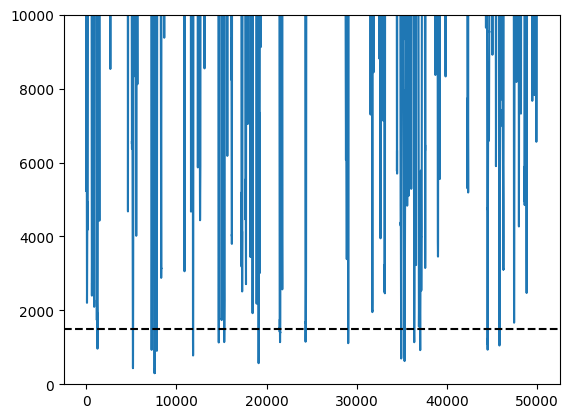

In [83]:
fig, ax = plt.subplots()
ax.plot(energy_smoothed[50000:100000])
ax.axhline(1500, color='k', linestyle='--')
ax.set_ylim(0, )

In [28]:
seqs = segmenter.segment(audios)

/home/pimienta/miniconda3/envs/vocalpy-notebooks-env/lib/python3.10/site-packages/vocalpy/segment/energy.py:60: UserWarning: Values in `data` would overflow when squaring because of dtype, >i2;casting to a larger integer dtype to avoid
  energy_smoothed = signal.audio.smoothed_energy(audio, smooth_win)


[########################################] | 100% Completed | 103.31 ms


In [30]:
seqs[0]

Sequence(units=[Unit(onset=0.0, offset=12.30528125, label='-', audio=None, spectrogram=None)], method='energy', segment_params={'threshold': 1500, 'min_dur': 0.01, 'min_silent_dur': 0.006}, audio=vocalpy.Audio(data=None, samplerate=None, channels=None), path=data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0808.138.cbin), spectrogram=None)

In [31]:
spect_params = {'fft_size': 512, 'step_size': 64}
callback = voc.signal.spectrogram.spectrogram
spect_maker = voc.SpectrogramMaker(callback=callback, spect_params=spect_params)
spects = spect_maker.make(audios, parallelize=True)

[########################################] | 100% Completed | 102.86 ms


In [33]:
import umap

/home/pimienta/miniconda3/envs/vocalpy-notebooks-env/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/pimienta/miniconda3/envs/vocalpy-notebooks-env/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/pimienta/miniconda3/envs/voc

In [35]:
spects[0]

vocalpy.Spectrogram(data=array([[3.063...dtype=float32), frequencies=array([    0....7.5, 16000. ]), times=array([8.0000...  1.2296e+01]), path=None, audio_path=PosixPath('data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0808.138.cbin'))

In [52]:
seqs[2]

Sequence(units=[Unit(onset=0.0, offset=12.9018125, label='-', audio=None, spectrogram=None)], method='energy', segment_params={'threshold': 1500, 'min_dur': 0.01, 'min_silent_dur': 0.006}, audio=vocalpy.Audio(data=None, samplerate=None, channels=None), path=data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0810.148.cbin), spectrogram=None)

In [37]:
seq = seqs[0]

In [50]:
seq

Sequence(units=[Unit(onset=0.0, offset=12.30528125, label='-', audio=None, spectrogram=None)], method='energy', segment_params={'threshold': 1500, 'min_dur': 0.01, 'min_silent_dur': 0.006}, audio=vocalpy.Audio(data=None, samplerate=None, channels=None), path=data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0808.138.cbin), spectrogram=None)

In [42]:
start_times, stop_times = [], []
for unit in seq.units:
    start_times.append(unit.onset)
    stop_times.append(unit.offset)
start_times = np.array(start_times)
stop_times = np.array(stop_times)

In [44]:
spect = spects[0]

In [45]:
start_inds = np.argmin(
    np.subtract.outer(start_times, spect.times)
)

In [49]:
start_times

array([0.])

In [41]:
import numpy as np

def get_segs(seq, spect):
    start_times, stop_times = [], []
    for unit in seqs.units:
        start_times.append(unit.onset)
        stop_times.appen(unit.offset)
    start_times = np.array(start_times)
    stop_times = np.array(stop_times)
    start_inds = np.argmin(
        np.subtract.outer(start_times, spect.times)
    )
    stop_inds = np.argmin(
        np.subtract.outer(stop_times, spect.times)
    )
    

    

In [ ]:
segments = []
for sequence, spect in zip(seqs, spects):
    sequence